# Lenses Data Classification
<hr>

In this example, we would be considering the Lenses database, which is a database for fitting contact lenses. 

Database link : https://archive.ics.uci.edu/ml/datasets/lenses

#### Data Set Information:

The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit. 

This database is complete (all possible combinations of attribute-value pairs are represented). 
Each instance is complete and correct. 
9 rules cover the training set.


#### Attribute Information:

<pre>
-- 3 Classes 
1 : the patient should be fitted with hard contact lenses, 
2 : the patient should be fitted with soft contact lenses, 
3 : the patient should not be fitted with contact lenses. 

1. age of the patient: (1) young, (2) pre-presbyopic, (3) presbyopic 
2. spectacle prescription: (1) myope, (2) hypermetrope 
3. astigmatic: (1) no, (2) yes 
4. tear production rate: (1) reduced, (2) normal
</pre>

In [1]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report,log_loss


In [2]:
cols = []
for r in range(11):
    cols.append('c'+str(r))

In [3]:
# read .csv from provided dataset
csv_filename="lenses.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename,sep=' ',names=cols)

In [4]:
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,1,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,3.0
1,2,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN,2.0
2,3,NaN,1.0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,3.0
3,4,NaN,1.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,1.0
4,5,NaN,1.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,3.0
5,6,NaN,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0
6,7,NaN,1.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,3.0
7,8,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0
8,9,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,3.0
9,10,2.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN


In [5]:
df.fillna(0 ,inplace=True)

In [6]:
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
1,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
2,3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,3.0
3,4,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0
4,5,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,3.0


In [7]:
df['Age'] = df['c1'] + df['c2']

In [8]:
df['Specs'] = df['c3'] + df['c4']

In [9]:
df['Astigmatic'] = df['c5'] + df['c6']

In [10]:
df['Tear-Production-Rate'] = df['c7'] + df['c8']

In [11]:
df['Target-Lenses'] = df['c9'] + df['c10']

In [12]:
df.drop(cols,axis=1,inplace=True)

In [13]:
df

,Age,Specs,Astigmatic,Tear-Production-Rate,Target-Lenses
0,1.0,1.0,1.0,1.0,3.0
1,1.0,1.0,1.0,2.0,2.0
2,1.0,1.0,2.0,1.0,3.0
3,1.0,1.0,2.0,2.0,1.0
4,1.0,2.0,1.0,1.0,3.0
5,1.0,2.0,1.0,2.0,2.0
6,1.0,2.0,2.0,1.0,3.0
7,1.0,2.0,2.0,2.0,1.0
8,2.0,1.0,1.0,1.0,3.0
9,2.0,1.0,1.0,2.0,2.0


In [14]:
df.columns

Index([u'Age', u'Specs', u'Astigmatic', u'Tear-Production-Rate',
       u'Target-Lenses'],
      dtype='object')

In [159]:
features = ['Age', 'Specs', 'Astigmatic', 'Tear-Production-Rate']
X = df[features]
y = df['Target-Lenses']

In [160]:
X.head()

,Age,Specs,Astigmatic,Tear-Production-Rate
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0
3,1.0,1.0,2.0,2.0
4,1.0,2.0,1.0,1.0


In [161]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [162]:
print X_train.shape, y_train.shape

(14, 4) (14L,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 3 - Milk (0.138606) 
2. feature 1 - Feathers (0.138508) 
3. feature 2 - Eggs (0.113904) 
4. feature 7 - Toothed (0.083274) 
5. feature 0 - Hair (0.083251) 
6. feature 8 - Backbone (0.082373) 
7. feature 9 - Breathes (0.076449) 
8. feature 11 - Fins (0.063457) 
9. feature 13 - Tail (0.050104) 
10. feature 12 - Legs (0.048997) 
11. feature 5 - Aquatic (0.035794) 
12. feature 4 - Airborne (0.035151) 
13. feature 16 - animals (0.016738) 
14. feature 15 - Catsize (0.011835) 
15. feature 6 - Predator (0.011787) 
16. feature 10 - Venomous (0.009257) 
17. feature 14 - Domestic (0.000515) 


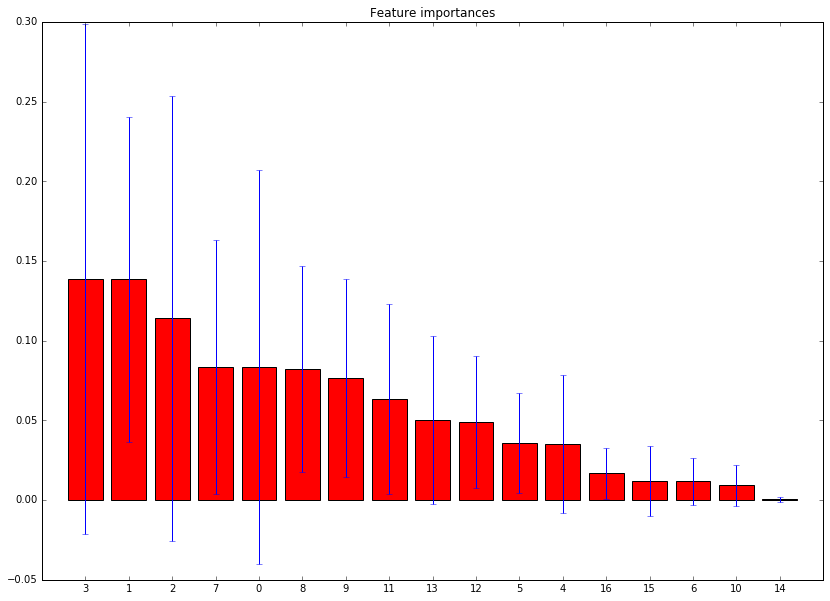

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [68]:
importances[indices[:5]]

array([ 0.13860564,  0.13850845,  0.11390376,  0.083274  ,  0.08325078])

In [69]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 3 - Milk (0.138606)
2. feature 1 - Feathers (0.138508)
3. feature 2 - Eggs (0.113904)
4. feature 7 - Toothed (0.083274)
5. feature 0 - Hair (0.083251)


In [70]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

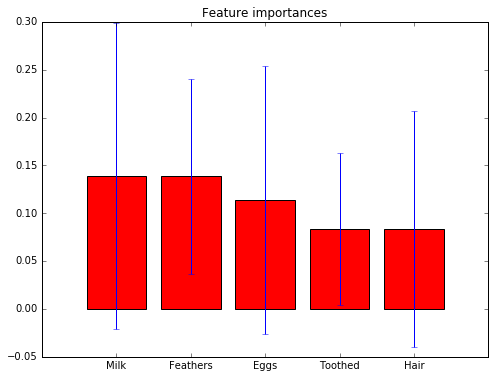

In [71]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [163]:
t0=time()
print "DecisionTree"

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print "Acurracy: ", clf_dt.score(X_test,y_test)
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
Acurracy:  0.7
time elapsed:  0.0350000858307


## cross validation for DT

In [164]:
tt0=time()
print "cross result========"
scores = cross_validation.cross_val_score(dt, X, y, cv=3)
print scores
print scores.mean()
tt1=time()
print "time elapsed: ", tt1-tt0
print "\n"

cross result========
[ 0.55555556  0.625       0.71428571]
0.631613756614
time elapsed:  0.055999994278




### Tuning our hyperparameters using GridSearch

In [165]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)

print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   18.1s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.719
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 1
	clf__min_samples_split: 5
             precision    recall  f1-score   support

        1.0       0.50      1.00      0.67         1
        2.0       1.00      1.00      1.00         2
        3.0       1.00      0.86      0.92         7

avg / total       0.95      0.90      0.91        10



# Random Forest accuracy and time elapsed caculation

In [166]:
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print "Acurracy: ", clf_rf.score(X_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  1.0
time elapsed:  1.02699995041


## cross validation for RF

In [167]:
tt2=time()
print "cross result========"
scores = cross_validation.cross_val_score(rf, X, y, cv=3)
print scores
print scores.mean()
tt3=time()
print "time elapsed: ", tt3-tt2
print "\n"


cross result========
[ 0.88888889  0.875       0.85714286]
0.873677248677
time elapsed:  3.34599995613




### Tuning Models using GridSearch

In [168]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   34.0s finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.786
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 1
	clf__min_samples_split: 1
	clf__n_estimators: 5
Accuracy: 0.9
             precision    recall  f1-score   support

        1.0       0.50      1.00      0.67         1
        2.0       1.00      1.00      1.00         2
        3.0       1.00      0.86      0.92         7

avg / total       0.95      0.90      0.91        10



# Naive Bayes accuracy and time elapsed caculation


In [169]:
t4=time()
print "NaiveBayes"
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print "Acurracy: ", clf_nb.score(X_test,y_test)
t5=time()
print "time elapsed: ", t5-t4

NaiveBayes
Acurracy:  0.7
time elapsed:  0.296000003815


## cross-validation for NB

In [170]:
tt4=time()
print "cross result========"
scores = cross_validation.cross_val_score(nb, X,y, cv=3)
print scores
print scores.mean()
tt5=time()
print "time elapsed: ", tt5-tt4
print "\n"

cross result========
[ 0.55555556  0.625       0.71428571]
0.631613756614
time elapsed:  0.256999969482




# KNN accuracy and time elapsed caculation

In [171]:
t6=time()
print "KNN"
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
print "Acurracy: ", clf_knn.score(X_test,y_test) 
t7=time()
print "time elapsed: ", t7-t6

KNN
Acurracy:  0.8
time elapsed:  0.0480000972748


## cross validation for KNN

In [172]:
tt6=time()
print "cross result========"
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print scores
print scores.mean()
tt7=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 1.   1.   0.8  0.6  0.5]
0.78
time elapsed:  0.0869998931885




C:\Miniconda2\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


### Fine tuning the model using GridSearch

In [ ]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,]}

grid = grid_search.GridSearchCV(knn, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

# SVM accuracy and time elapsed caculation

In [174]:
t7=time()
print "SVM"

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print "Acurracy: ", clf_svc.score(X_test,y_test) 
t8=time()
print "time elapsed: ", t8-t7

SVM
Acurracy:  0.7
time elapsed:  0.0380001068115


## cross validation for SVM

In [175]:
tt7=time()
print "cross result========"
scores = cross_validation.cross_val_score(svc,X,y, cv=5)
print scores
print scores.mean()
tt8=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.6   0.6   0.6   0.6   0.75]
0.63
time elapsed:  54.5379998684




In [176]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.571

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.5s finished
C:\Miniconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Best parameters set:
	C: 1
	kernel: 'linear'
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00         1
        2.0       0.00      0.00      0.00         2
        3.0       0.78      1.00      0.88         7

avg / total       0.64      0.80      0.71        10



In [178]:
pipeline = Pipeline([
    ('clf', SVC(kernel='linear', gamma=0.01, C=1))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   18.4s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.571
Best parameters set:
	clf__C: 0.1
	clf__gamma: 0.01
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         1
        2.0       0.00      0.00      0.00         2
        3.0       0.70      1.00      0.82         7

avg / total       0.49      0.70      0.58        10



# Unsupervised Learning

In [15]:
features = ['Age', 'Specs', 'Astigmatic', 'Tear-Production-Rate']

In [16]:
df1 = df[features]

In [17]:
df1.head()

,Age,Specs,Astigmatic,Tear-Production-Rate
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0
3,1.0,1.0,2.0,2.0
4,1.0,2.0,1.0,1.0


## PCA

In [18]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 6 components for 6 variables
pca.fit(df1)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 1.          0.          0.          0.        ]
 [ 0.         -0.57735027 -0.57735027 -0.57735027]
 [-0.         -0.25819889  0.79991984 -0.54172095]
 [-0.         -0.77459667  0.16369154  0.61090513]]
[ 0.47058824  0.17647059  0.17647059  0.17647059]


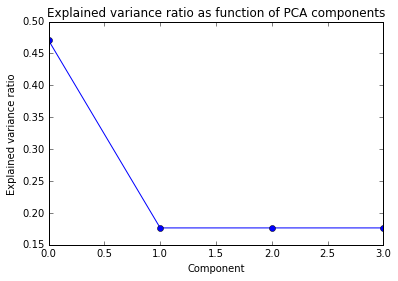

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [73]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [81]:
y = df['Target-Lenses']

In [82]:
target = array(y.unique())

In [83]:
target

array([ 3.,  2.,  1.])

In [84]:
def plot_pca_scatter():
    colors = ['blue', 'red', 'green']
    for i in xrange(len(colors)):
        px = X_pca[:, 0][y == i+1]
        py = X_pca[:, 1][y == i+1]
        plt.scatter(px, py, c=colors[i])
    plt.legend(target)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


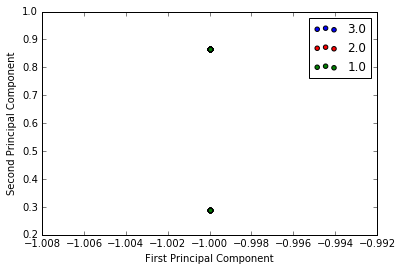

In [85]:
from sklearn.decomposition import PCA

estimator = PCA(n_components=3)
X_pca = estimator.fit_transform(X)
plot_pca_scatter() # Note that we only plot the first and second principal component

## Clustering

In [21]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [22]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df1)
print(reduced_data[:10])  # print upto 10 elements

[[-1.          0.8660254 ]
 [-1.          0.28867513]
 [-1.          0.28867513]
 [-1.         -0.28867513]
 [-1.          0.28867513]
 [-1.         -0.28867513]
 [-1.         -0.28867513]
 [-1.         -0.8660254 ]
 [ 0.          0.8660254 ]
 [ 0.          0.28867513]]


In [23]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

# TRIED OUT 2,3,4,5,6 CLUSTERS AND CONCLUDED THAT 3 CLUSTERS ARE A SENSIBLE CHOICE BASED ON VISUAL INSPECTION, SINCE 
# WE OBTAIN ONE CENTRAL CLUSTER AND TWO CLUSTERS THAT SPREAD FAR OUT IN TWO DIRECTIONS.
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(reduced_data)
print(clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [24]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
# Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print('*** K MEANS CENTROIDS ***')
print(centroids)

# TRANSFORM DATA BACK TO ORIGINAL SPACE FOR ANSWERING 7
print('*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***')
print(pca.inverse_transform(centroids))

*** K MEANS CENTROIDS ***
[[ -1.00000000e+00   1.34151949e-16]
 [  0.00000000e+00  -4.62592927e-18]
 [  1.00000000e+00  -7.40148683e-17]]
*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***
[[ 1.   1.5  1.5  1.5]
 [ 2.   1.5  1.5  1.5]
 [ 3.   1.5  1.5  1.5]]


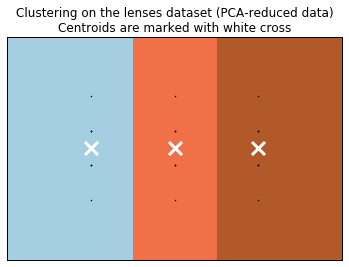

In [26]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the lenses dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Elbow Method

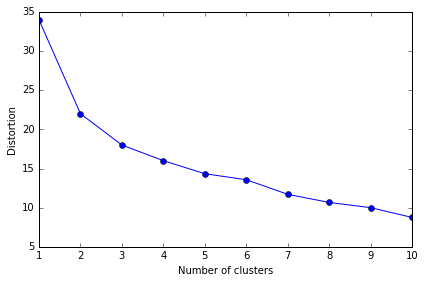

In [40]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

## Quantifying the quality of clustering via silhouette plots

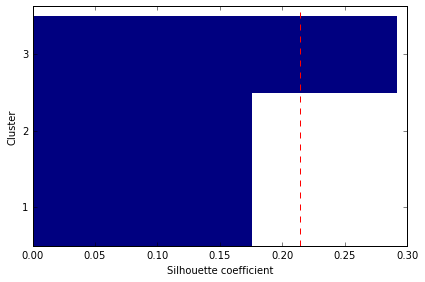

In [41]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Our clustering with 3 centroids is good.
### Bad Clustering:

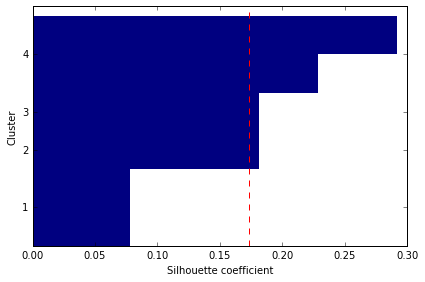

In [43]:
km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette_bad.png', dpi=300)
plt.show()

## Organizing clusters as a hierarchical tree

### Performing hierarchical clustering on a distance matrix
To calculate the distance matrix as input for the hierarchical clustering algorithm, we will use the pdist function from SciPy's spatial.distance submodule:

In [57]:
labels = []
for i in range(df1.shape[0]):
    str = 'ID_{}'.format(i)
    labels.append(str)

In [61]:
from scipy.spatial.distance import pdist,squareform

row_dist = pd.DataFrame(squareform(pdist(df1, metric='euclidean')), columns=labels, index=labels)
row_dist[:5]

,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,...,ID_14,ID_15,ID_16,ID_17,ID_18,ID_19,ID_20,ID_21,ID_22,ID_23
ID_0,0.000000,1.000000,1.000000,1.414214,1.000000,1.414214,1.414214,1.732051,1.000000,1.414214,...,1.732051,2.000000,2.000000,2.236068,2.236068,2.449490,2.236068,2.449490,2.449490,2.645751
ID_1,1.000000,0.000000,1.414214,1.000000,1.414214,1.000000,1.732051,1.414214,1.414214,1.000000,...,2.000000,1.732051,2.236068,2.000000,2.449490,2.236068,2.449490,2.236068,2.645751,2.449490
ID_2,1.000000,1.414214,0.000000,1.000000,1.414214,1.732051,1.000000,1.414214,1.414214,1.732051,...,1.414214,1.732051,2.236068,2.449490,2.000000,2.236068,2.449490,2.645751,2.236068,2.449490
ID_3,1.414214,1.000000,1.000000,0.000000,1.732051,1.414214,1.414214,1.000000,1.732051,1.414214,...,1.732051,1.414214,2.449490,2.236068,2.236068,2.000000,2.645751,2.449490,2.449490,2.236068
ID_4,1.000000,1.414214,1.414214,1.732051,0.000000,1.000000,1.000000,1.414214,1.414214,1.732051,...,1.414214,1.732051,2.236068,2.449490,2.449490,2.645751,2.000000,2.236068,2.236068,2.449490


In [62]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,2.037116,2.0
cluster 2,2.0,3.0,2.037116,2.0
cluster 3,16.0,17.0,2.037116,2.0
cluster 4,18.0,19.0,2.037116,2.0
cluster 5,20.0,21.0,2.037116,2.0
cluster 6,22.0,23.0,2.037116,2.0
cluster 7,4.0,5.0,2.037116,2.0
cluster 8,6.0,7.0,2.037116,2.0
cluster 9,14.0,15.0,2.161013,2.0
cluster 10,8.0,9.0,2.161013,2.0


In [63]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,2.0,1.000000,2.0
cluster 2,1.0,5.0,1.000000,2.0
cluster 3,3.0,7.0,1.000000,2.0
cluster 4,4.0,6.0,1.000000,2.0
cluster 5,8.0,10.0,1.000000,2.0
cluster 6,9.0,13.0,1.000000,2.0
cluster 7,11.0,19.0,1.000000,2.0
cluster 8,12.0,14.0,1.000000,2.0
cluster 9,15.0,23.0,1.000000,2.0
cluster 10,16.0,17.0,1.000000,2.0


In [64]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,2.0,1.000000,2.0
cluster 2,1.0,5.0,1.000000,2.0
cluster 3,3.0,7.0,1.000000,2.0
cluster 4,4.0,6.0,1.000000,2.0
cluster 5,8.0,10.0,1.000000,2.0
cluster 6,9.0,13.0,1.000000,2.0
cluster 7,11.0,19.0,1.000000,2.0
cluster 8,12.0,14.0,1.000000,2.0
cluster 9,15.0,23.0,1.000000,2.0
cluster 10,16.0,17.0,1.000000,2.0


As shown in the following table, the linkage matrix consists of several rows where each row represents one merge. The first and second columns denote the most dissimilar members in each cluster, and the third row reports the distance between those members. The last column returns the count of the members in each cluster.

Now that we have computed the linkage matrix, we can visualize the results in the form of a dendrogram:

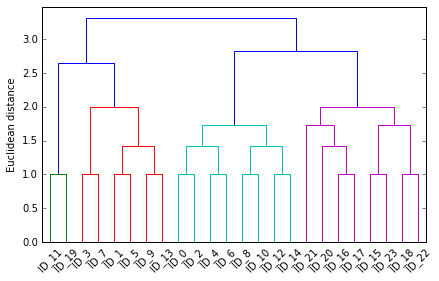

In [66]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

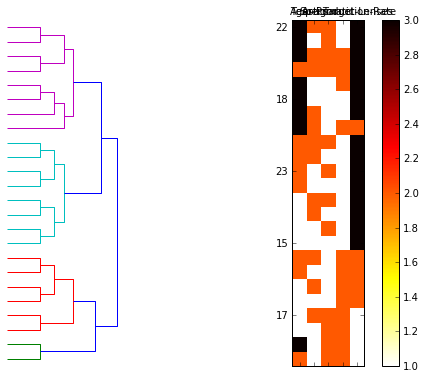

In [67]:
# plot row dendrogram
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='right')

# reorder data with respect to clustering
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)


        
# plot heatmap
axm = fig.add_axes([0.23,0.1,0.6,0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

### Applying agglomerative clustering via scikit-learn

In [69]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


___

In [98]:
from sklearn.cross_validation import train_test_split
X = df[features]
y = df['Target-Lenses']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values ,test_size=0.25, random_state=42)

In [102]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=5)
clf.fit(X_train)
print clf.labels_.shape
print clf.labels_

(18L,)
[2 1 2 1 1 2 0 1 1 0 2 2 0 1 0 0 0 1]


In [103]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

In [104]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:-0.18
Homogeneity score:0.37 
Completeness score: 0.31 
Confusion matrix
[[0 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 1 2 0]]


### Affinity Propogation

In [105]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print aff.cluster_centers_indices_.shape

(4L,)


In [107]:
y_pred = aff.predict(X_test)

In [108]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:0.062
Homogeneity score:0.73 
Completeness score: 0.48 
Confusion matrix
[[0 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 2 1]]


In [109]:
#MeanShift
ms = cluster.MeanShift()
ms.fit(X_train)
print ms.cluster_centers_

[[ 1.41666667  1.66666667  1.58333333  1.5       ]
 [ 3.          1.5         1.5         2.        ]]


In [110]:
y_pred = ms.predict(X_test)

In [111]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:-0.22
Homogeneity score:0.2 
Completeness score: 0.27 
Confusion matrix
[[0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [2 2 0 0]]


### Mixture of Guassian Models

In [112]:
from sklearn import mixture

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GMM(n_components=3, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print "Adjusted rand score for covariance={}:{:.2}".format(covariance_type, metrics.adjusted_rand_score(y_test_heldout, y_pred))


Adjusted rand score for covariance=spherical:-0.25
Adjusted rand score for covariance=tied:0.0
Adjusted rand score for covariance=diag:-0.15
Adjusted rand score for covariance=full:-0.25


In [114]:
gm = mixture.GMM(n_components=3, covariance_type='tied', random_state=42)
gm.fit(X_train)

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001, verbose=0)

In [116]:
# Print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))

print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:-0.18
Homogeneity score:0.37 
Completeness score: 0.31 
Confusion matrix
[[0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 1 2 0]]


---